In [1]:
### Unzip the training dataset if not re-generated
import zipfile

with zipfile.ZipFile('synthetic_dataset_5agents.zip' , 'r') as zip_ref:
    zip_ref.extractall('synthetic_dataset_5agents')

print("Extraction complete!")


Extraction complete!


In [2]:
import numpy as np 
from tqdm.auto import tqdm 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import pickle

import jax 
import jax.numpy as jnp 
from jax import vmap

import flax.linen as nn 
from flax.training import train_state
import optax 

### Preprocess dataset

In [3]:
def sliding_split(data, goal_expand, past_steps, futr_steps):
    num_steps = data.shape[-2]
    start = past_steps 
    end = num_steps - futr_steps
    data_x = []
    data_y = []
    for t in range(start, end):
        prev_traj = data[..., t-past_steps: t, :]
        prev_traj = jnp.concatenate([prev_traj, goal_expand], axis=-1)
        data_x.append(prev_traj.copy())
        futr_traj = data[..., t: t+futr_steps, :]
        data_y.append(futr_traj.copy())
    return np.array(data_x), np.array(data_y)

In [4]:
num_trials = 50
past_steps = 10
futr_steps = 30

dataset = []
dataset_1 = []
dataset_2 = []
dataset_3 = []
dataset_4 = []
dataset_5 = []

train_data = []
test_data = []

train_data_1 = []
test_data_1 = []
train_data_2 = []
test_data_2 = []
train_data_3 = []
test_data_3 = []
train_data_4 = []
test_data_4 = []
train_data_5 = []
test_data_5 = []

goal_dataset = []
goal_1_dataset = []
goal_2_dataset = []
goal_3_dataset = []
goal_4_dataset = []
goal_5_dataset = []

for idx in tqdm(range(num_trials)):
    trial_path = f'./synthetic_dataset_5agents/trial_{idx:03d}/'
    x_traj_list = np.load(trial_path + 'x_traj.npy')[:, :-15, :]
    
    dataset.append(x_traj_list.copy())
    dataset_1.append(x_traj_list[0].copy())
    dataset_2.append(x_traj_list[1].copy())
    dataset_3.append(x_traj_list[2].copy())
    dataset_4.append(x_traj_list[3].copy())
    dataset_5.append(x_traj_list[4].copy())

    goal = np.load(trial_path + 'goal.npy')
    goal_expand = np.tile(goal[:,None,:], reps=(1,past_steps,1))
    goal_dataset.append(goal.copy())
    goal_1_dataset.append(goal[0].copy())
    goal_2_dataset.append(goal[1].copy())
    goal_3_dataset.append(goal[2].copy())
    goal_4_dataset.append(goal[3].copy())
    goal_5_dataset.append(goal[4].copy())

    x_train, x_test = sliding_split(x_traj_list, goal_expand, past_steps, futr_steps)
    train_data.append(x_train.copy())
    test_data.append(x_test.copy())

    goal_1 = goal[0]
    goal_1_expand = np.tile(goal_1, reps=(past_steps,1))
    x_train_1, x_test_1 = sliding_split(x_traj_list[0], goal_1_expand, past_steps, futr_steps)
    train_data_1.append(x_train_1.copy())
    test_data_1.append(x_test_1.copy())

    goal_2 = goal[1]
    goal_2_expand = np.tile(goal_2, reps=(past_steps,1))
    x_train_2, x_test_2 = sliding_split(x_traj_list[1], goal_2_expand, past_steps, futr_steps)
    train_data_2.append(x_train_2.copy())
    test_data_2.append(x_test_2.copy())

    goal_3 = goal[2]
    goal_3_expand = np.tile(goal_3, reps=(past_steps,1))
    x_train_3, x_test_3 = sliding_split(x_traj_list[2], goal_3_expand, past_steps, futr_steps)
    train_data_3.append(x_train_3.copy())
    test_data_3.append(x_test_3.copy())

    goal_4 = goal[3]
    goal_4_expand = np.tile(goal_4, reps=(past_steps,1))
    x_train_4, x_test_4 = sliding_split(x_traj_list[3], goal_4_expand, past_steps, futr_steps)
    train_data_4.append(x_train_4.copy())
    test_data_4.append(x_test_4.copy())

    goal_5 = goal[4]
    goal_5_expand = np.tile(goal_5, reps=(past_steps,1))
    x_train_5, x_test_5 = sliding_split(x_traj_list[4], goal_5_expand, past_steps, futr_steps)
    train_data_5.append(x_train_5.copy())
    test_data_5.append(x_test_5.copy())


train_data = np.concatenate(train_data, axis=0) 
test_data = np.concatenate(test_data, axis=0) 
data_x = train_data.reshape(-1, *train_data.shape[-2:])
data_y = test_data.reshape(-1, *test_data.shape[-2:])
print(f'data_x.shape: {data_x.shape}\ndata_y.shape: {data_y.shape}')

data_x_1 = np.concatenate(train_data_1, axis=0) 
data_y_1 = np.concatenate(test_data_1, axis=0) 
print(f'\ndata_x_1.shape: {data_x_1.shape}\ndata_y_1.shape: {data_y_1.shape}')

data_x_2 = np.concatenate(train_data_2, axis=0) 
data_y_2 = np.concatenate(test_data_2, axis=0) 
print(f'\ndata_x_2.shape: {data_x_2.shape}\ndata_y_2.shape: {data_y_2.shape}')

data_x_3 = np.concatenate(train_data_3, axis=0) 
data_y_3 = np.concatenate(test_data_3, axis=0) 
print(f'\ndata_x_3.shape: {data_x_3.shape}\ndata_y_3.shape: {data_y_3.shape}')

data_x_4 = np.concatenate(train_data_4, axis=0) 
data_y_4 = np.concatenate(test_data_4, axis=0) 
print(f'\ndata_x_4.shape: {data_x_4.shape}\ndata_y_4.shape: {data_y_4.shape}')

data_x_5 = np.concatenate(train_data_5, axis=0) 
data_y_5 = np.concatenate(test_data_5, axis=0) 
print(f'\ndata_x_5.shape: {data_x_5.shape}\ndata_y_5.shape: {data_y_5.shape}')

  0%|          | 0/50 [00:00<?, ?it/s]

2025-02-23 11:37:01.046339: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.5.82). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


data_x.shape: (12535, 10, 8)
data_y.shape: (12535, 30, 4)

data_x_1.shape: (2507, 10, 8)
data_y_1.shape: (2507, 30, 4)

data_x_2.shape: (2507, 10, 8)
data_y_2.shape: (2507, 30, 4)

data_x_3.shape: (2507, 10, 8)
data_y_3.shape: (2507, 30, 4)

data_x_4.shape: (2507, 10, 8)
data_y_4.shape: (2507, 30, 4)

data_x_5.shape: (2507, 10, 8)
data_y_5.shape: (2507, 30, 4)


In [5]:
key = jax.random.key(10)

perm = jax.random.permutation(key, data_x.shape[0])
data_x = data_x[perm]
data_y = data_y[perm]

key, _ = jax.random.split(key)
perm = jax.random.permutation(key, data_x_1.shape[0])
data_x_1 = data_x_1[perm]
data_y_1 = data_y_1[perm]
data_x_2 = data_x_2[perm]
data_y_2 = data_y_2[perm]
data_x_3 = data_x_3[perm]
data_y_3 = data_y_3[perm]
data_x_4 = data_x_4[perm]
data_y_4 = data_y_4[perm]
data_x_5 = data_x_5[perm]
data_y_5 = data_y_5[perm]

In [6]:
### Split training and test set for CVAE

num_data = data_x.shape[0] - int(data_x.shape[0] % 1000)
num_data_all = num_data
num_test = 128

train_input_data = jnp.array(data_x[:num_data])
train_output_data = jnp.array(data_y[:num_data])
print(f'train_input_data.shape: {train_input_data.shape}, train_output_data.shape: {train_output_data.shape}')
test_input_data = jnp.array(data_x[-num_test:])
test_output_data = jnp.array(data_y[-num_test:])
print(f'test_input_data.shape: {test_input_data.shape}, test_output_data.shape: {test_output_data.shape}')

test_input_data_og = test_input_data.copy()
test_output_data_og = test_output_data.copy()

train_input_data.shape: (12000, 10, 8), train_output_data.shape: (12000, 30, 4)
test_input_data.shape: (128, 10, 8), test_output_data.shape: (128, 30, 4)


In [7]:
### Transform the trajectory data to the body frame, 
### it makes training CVAE more stable with limited data

def state2lie(state):
    xt, yt, theta, vel = state
    lie_mat = jnp.array([
        [jnp.cos(theta), -jnp.sin(theta), xt],
        [jnp.sin(theta),  jnp.cos(theta), yt],
        [0.0, 0.0, 1.0]
    ])
    return lie_mat 


def lie2state(mat):
    x, y = mat[:2,2]
    theta = jnp.arctan2(mat[1,0], mat[0,0])
    return jnp.array([x, y, theta])


def se2inv(mat):
    R = mat[:2, :2]
    t = mat[:2, 2]
    R_inv = R.T
    t_inv = -R.T @ t 
    return jnp.array([
        [R_inv[0,0], R_inv[0,1], t_inv[0]],
        [R_inv[1,0], R_inv[1,1], t_inv[1]],
        [0.0, 0.0, 1.0]
    ])


@jax.jit
def fwd_tf_traj(curr_state, xy_traj):
    tf_mat = se2inv(state2lie(curr_state))
    xy_traj_tf = vmap(jnp.matmul, in_axes=(None,0))(tf_mat[:2,:2], xy_traj[...,:2])[...,:2] + tf_mat[:2,2]
    return xy_traj_tf


@jax.jit
def bwd_tf_traj(curr_state, xy_traj):
    tf_mat = state2lie(curr_state)
    xy_traj_tf = vmap(jnp.matmul, in_axes=(None,0))(tf_mat[:2,:2], xy_traj[...,:2])[...,:2] + tf_mat[:2,2]
    return xy_traj_tf


@jax.jit
def fwd_tf_goal(curr_state, xy_goal):
    tf_mat = se2inv(state2lie(curr_state))
    xy_goal_tf = jnp.matmul(tf_mat[:2,:2], xy_goal[...,:2])[...,:2] + tf_mat[:2,2]
    return xy_goal_tf


@jax.jit
def bwd_tf_goal(curr_state, xy_goal):
    tf_mat = state2lie(curr_state)
    xy_goal_tf = jnp.matmul(tf_mat[:2,:2], xy_goal[...,:2])[...,:2] + tf_mat[:2,2]
    return xy_goal_tf


def transform(_past_traj, futr_traj):
    past_traj_state = _past_traj[..., :4]
    past_traj_goal = _past_traj[..., 4:]

    curr_state = past_traj_state[-1]

    transformed_past_traj_state = fwd_tf_traj(curr_state, past_traj_state)
    transformed_past_traj_goal = fwd_tf_traj(curr_state, past_traj_goal)
    # transformed_past_traj_goal /= jnp.linalg.norm(transformed_past_traj_goal, axis=-1)[:,None]
    transformed_past_traj = jnp.concatenate([transformed_past_traj_state, transformed_past_traj_goal], axis=-1)
    transformed_futr_traj = fwd_tf_traj(curr_state, futr_traj)

    return transformed_past_traj, transformed_futr_traj

In [8]:
train_input_data, train_output_data = vmap(transform, in_axes=(0,0))(train_input_data, train_output_data)
train_output_data = train_output_data[...,:2]
print(f'train_input_data.shape: {train_input_data.shape}, train_output_data.shape: {train_output_data.shape}')

test_input_data, test_output_data = vmap(transform, in_axes=(0,0))(test_input_data, test_output_data)
test_output_data = test_output_data[..., :2]

print(f'test_input_data.shape: {test_input_data.shape}, test_output_data.shape: {test_output_data.shape}')

train_input_data.shape: (12000, 10, 4), train_output_data.shape: (12000, 30, 2)
test_input_data.shape: (128, 10, 4), test_output_data.shape: (128, 30, 2)


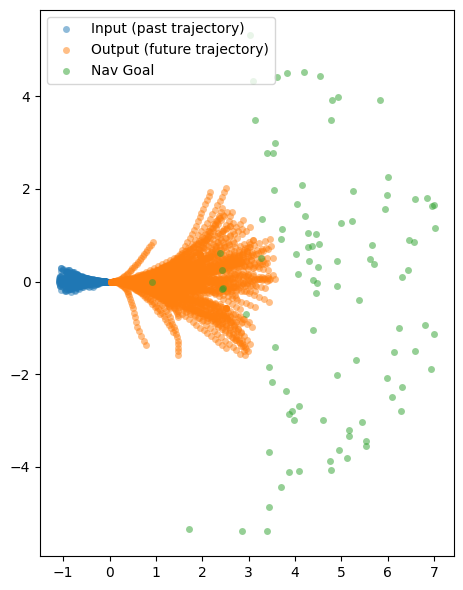

In [9]:
### Visualize the transformed trajectory dataset

agent_radius = 0.5
obst_radius = 1.5
scene_radius = 4.0
num_vis_data = 500

fig, ax = plt.subplots(1, 1, figsize=(6,6), dpi=100, tight_layout=True)

circle2 = patches.Circle(
    (0.0, 0.0), 
    obst_radius,
    edgecolor='k', linestyle='--', facecolor='none'
)
circle3 = patches.Circle(
    (0.0, 0.0), 
    scene_radius + agent_radius,
    edgecolor='k', linestyle='--', facecolor='none'
)
ax.set_aspect('equal')
num_vis = 100  # number of splitted trajectory data tuple to be visualized
ax.plot(train_input_data[:num_vis,:,0].ravel(), train_input_data[:num_vis,:,1].ravel(), linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C0', alpha=0.5, label='Input (past trajectory)')
ax.plot(train_output_data[:num_vis,:,0].ravel(), train_output_data[:num_vis,:,1].ravel(), linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C1', alpha=0.5, label='Output (future trajectory)')
ax.plot(train_input_data[:num_vis,0,2].ravel(), train_input_data[:num_vis,0,3].ravel(), linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C2', alpha=0.5, label='Nav Goal')
ax.legend()
plt.show()
plt.close()

### Training CVAE

In [10]:
# Define the VAE model
class Encoder(nn.Module):
    hidden_dim: int 
    latent_dim: int 

    def reparameterize(self, rng, mean, logvar):
        std = jnp.exp(0.5 * logvar)
        eps = jax.random.normal(rng, logvar.shape)
        return mean + eps * std

    @nn.compact
    def __call__(self, x, c, rng):
        h_x, _ = nn.RNN(nn.GRUCell(self.hidden_dim), return_carry=True)(x)
        h_c, _ = nn.RNN(nn.GRUCell(self.hidden_dim), return_carry=True)(c)
        h = jnp.concatenate([h_x, h_c], axis=-1)
  
        h = nn.relu(nn.Dense(self.hidden_dim)(h))
        h = nn.relu(nn.Dense(self.hidden_dim)(h))
        h = nn.relu(nn.Dense(self.hidden_dim)(h))
        z_mean = nn.Dense(self.latent_dim)(h)
        z_logvar = nn.Dense(self.latent_dim)(h)

        z = self.reparameterize(rng, z_mean, z_logvar)

        return z, z_mean, z_logvar
    

class Decoder(nn.Module):
    hidden_dim: int 
    output_dim: int

    @nn.compact
    def __call__(self, z, c):
        z = jnp.tile(z[:, jnp.newaxis, :], reps=(1, futr_steps, 1))
        h = nn.RNN(nn.GRUCell(self.hidden_dim))(z)

        h_c, _ = nn.RNN(nn.GRUCell(self.hidden_dim), return_carry=True)(c)
        h_c = jnp.tile(h_c[:, jnp.newaxis, :], reps=(1, futr_steps, 1))
        h = jnp.concatenate([h, h_c], axis=-1)

        h = nn.relu(nn.Dense(self.hidden_dim)(h))
        h = nn.relu(nn.Dense(self.hidden_dim)(h))
        h = nn.relu(nn.Dense(self.hidden_dim)(h))
        x_hat = nn.Dense(self.output_dim)(h)
        return x_hat
    

class CVAE(nn.Module):
    hidden_dim: int 
    latent_dim: int 
    output_dim: int 

    def setup(self) -> None:
        self.encoder = Encoder(self.hidden_dim, self.latent_dim)
        self.decoder = Decoder(self.hidden_dim, self.output_dim)
    
    def encode(self, x, c, rng):
        return self.encoder(x, c, rng)

    def decode(self, z, c):
        return self.decoder(z, c)
    
    def __call__(self, x, c, rng):
        z, z_mean, z_logvar = self.encoder(x, c, rng)
        x_hat = self.decoder(z, c)
        return x_hat, z_mean, z_logvar

In [11]:
input_dim = 2
hidden_dim = 256
latent_dim = 4
output_dim = 2
cond_dim = 4

key, subkey = jax.random.split(key)
cvae = CVAE(hidden_dim, latent_dim, output_dim)

key, subkey = jax.random.split(key)
params = cvae.init(key, jnp.ones((1, past_steps, input_dim)), jnp.ones((1, futr_steps, cond_dim)), subkey)['params']

In [12]:
def cvae_loss(x, x_hat, z_mean, z_logvar):
    traj_loss = jnp.mean(jnp.square(x-x_hat)) * 100.0 
    recon_loss = traj_loss # + end_loss
    kl_loss = -0.5 * jnp.mean(1 + z_logvar - jnp.square(z_mean) - jnp.exp(z_logvar))
    return recon_loss + kl_loss

In [13]:
train = False  # re-train if not use pre-trained weights

if train:
    lr = 1e-04
    optimizer = optax.adam(lr)
    opt_state = optimizer.init(params)

    #################################

    @jax.jit 
    def train_step(params, opt_state, x_batch, y_batch, rng):
        def loss_fn(params):
            x_hat, z_mean, z_logvar = cvae.apply(
                {'params': params}, x_batch, y_batch, rng
            )
            return cvae_loss(x_batch, x_hat, z_mean, z_logvar)
        
        loss, grads = jax.value_and_grad(loss_fn)(params)
        updates, opt_state = optimizer.update(grads, opt_state, params)
        params = optax.apply_updates(params, updates)
        return params, opt_state, loss 

    #################################

    num_epochs = 50
    batch_size = 64

    for epoch in tqdm(range(num_epochs+1)):
        key, subkey = jax.random.split(key)
        perm = jax.random.permutation(key, num_data)
        train_x = train_output_data[perm]
        train_y = train_input_data[perm]
    
        # mini-batch training 
        loss_log = []
        for i in range(0, num_data, batch_size):
            x_batch = train_x[i : i + batch_size]
            y_batch = train_y[i : i + batch_size]
            key, subkey = jax.random.split(key)
            params, opt_state, loss = train_step(params, opt_state, x_batch, y_batch, key)
            loss_log.append(loss)
            
        if epoch % 5 == 0:
            print(f'Epoch {epoch}, Loss: {np.mean(loss_log):.4f} +/- {np.std(loss_log):.4f}')

    #################################

    with open('cvae_5agents.pkl', 'wb') as f:
        pickle.dump(params, f)

else: 
    with open('cvae_5agents.pkl', 'rb') as f:
        params = pickle.load(f)
    pass

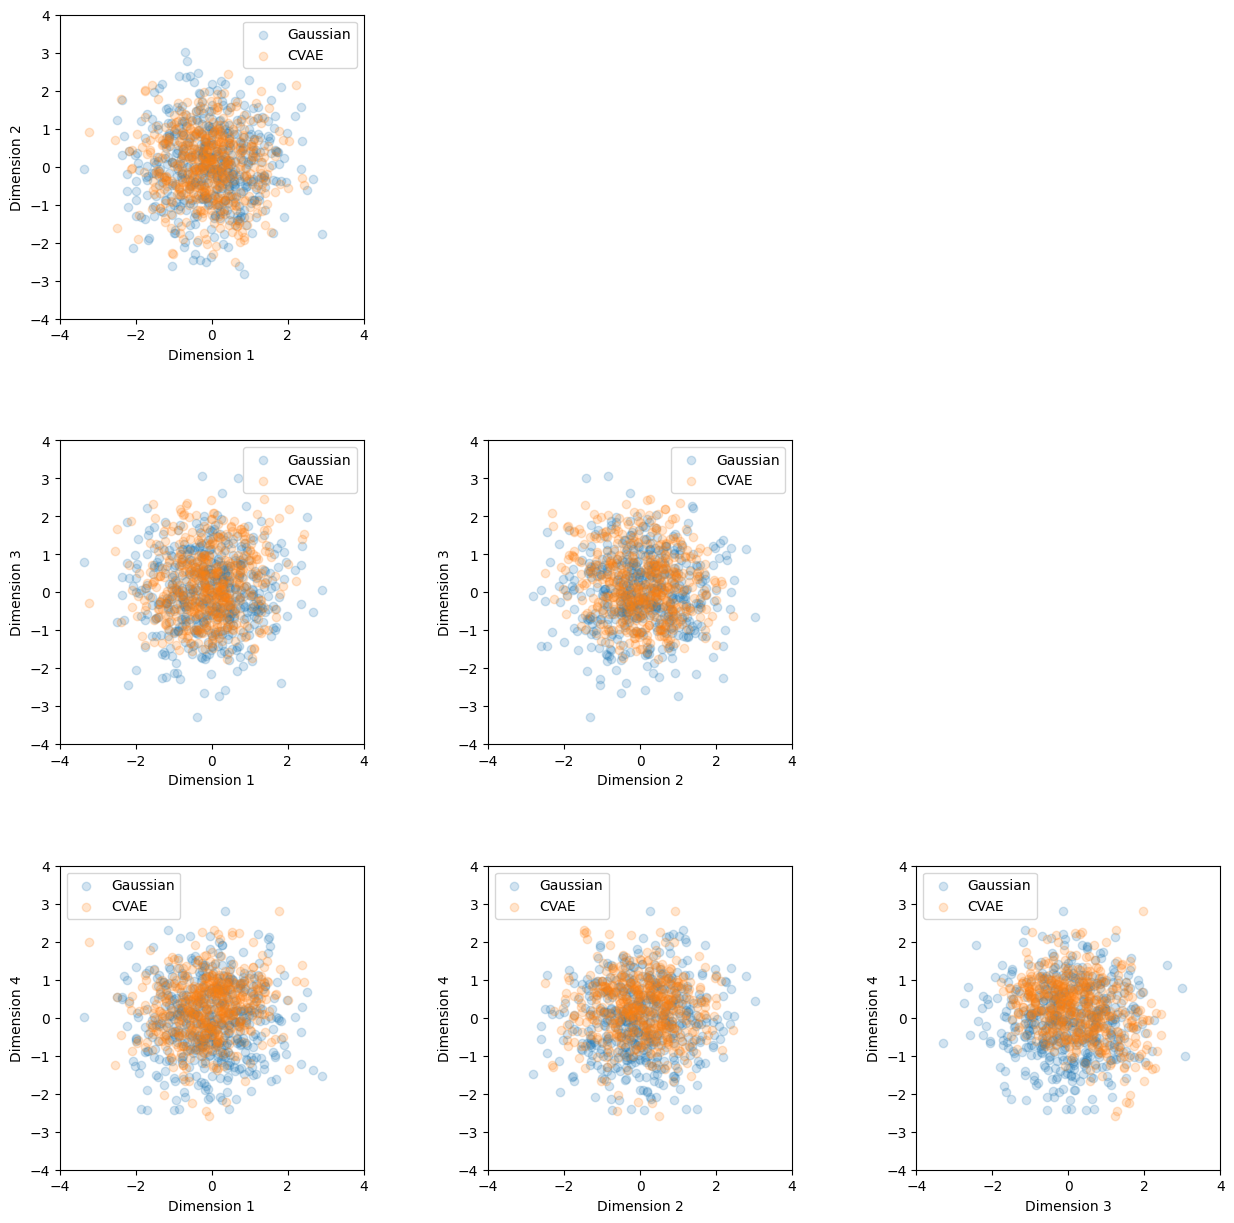

In [14]:
### Visualize the latent space
from md_plot import md_plot

key, subkey = jax.random.split(key)
train_z, train_z_mean, train_z_logvar = cvae.apply({'params': params}, train_output_data[:500], train_input_data[:500], subkey, method=cvae.encode)
normal_samples = jax.random.normal(key, shape=train_z[:500].shape)

md_plot([normal_samples, train_z], labels=['Gaussian', 'CVAE'])

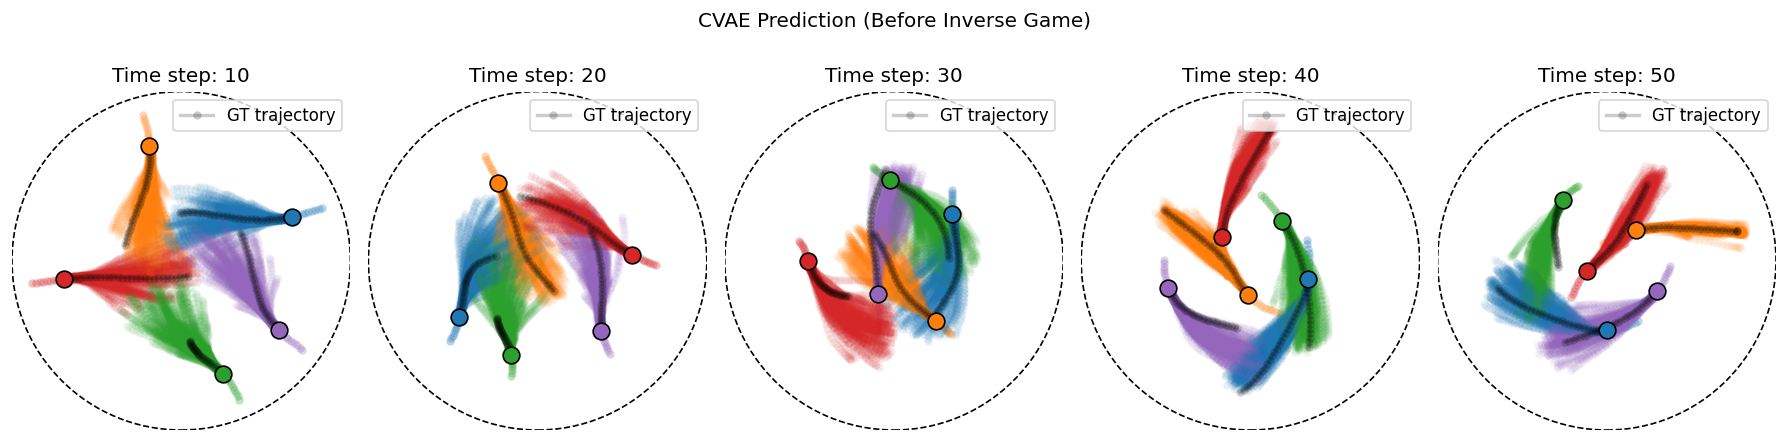

In [15]:
### Visualize the CVAE prediction

@jax.jit 
def evaluate(params, z, y):
    x_hat = cvae.apply({'params': params}, z, y, method=cvae.decode)
    return x_hat

num_samples = 100

agent_radius = 0.5
obst_radius = 0.0
scene_radius = 4.0

fig, axes = plt.subplots(1, 5, figsize=(15,4), dpi=120, tight_layout=True)
test_t_list = [past_steps, past_steps+10, past_steps+20, past_steps+30, past_steps+40]

test_idx = 12
for i, test_t in enumerate(test_t_list):
    circle = patches.Circle(
        (0.0, 0.0), 
        scene_radius + agent_radius,
        edgecolor='k', linestyle='--', facecolor='none'
    )
    ax = axes[i]
    ax.axis('off')
    ax.set_title(f'Time step: {test_t}')
    ax.set_aspect('equal')
    ax.set_xlim(-scene_radius-agent_radius, scene_radius+agent_radius)
    ax.set_ylim(-scene_radius-agent_radius, scene_radius+agent_radius)
    ax.add_patch(circle)

    input_traj_1 = dataset[i][0, test_t-past_steps:test_t, :]
    input_traj_2 = dataset[i][1, test_t-past_steps:test_t, :]
    input_traj_3 = dataset[i][2, test_t-past_steps:test_t, :]
    input_traj_4 = dataset[i][3, test_t-past_steps:test_t, :]
    input_traj_5 = dataset[i][4, test_t-past_steps:test_t, :]

    output_traj_1 = dataset[i][0, test_t:test_t+futr_steps, :]
    output_traj_2 = dataset[i][1, test_t:test_t+futr_steps, :]
    output_traj_3 = dataset[i][2, test_t:test_t+futr_steps, :]
    output_traj_4 = dataset[i][3, test_t:test_t+futr_steps, :]
    output_traj_5 = dataset[i][4, test_t:test_t+futr_steps, :]

    goal_1 = goal_dataset[i][0]
    goal_2 = goal_dataset[i][1]
    goal_3 = goal_dataset[i][2]
    goal_4 = goal_dataset[i][3]
    goal_5 = goal_dataset[i][4]

    curr_state_1 = input_traj_1[-1]
    curr_state_2 = input_traj_2[-1]
    curr_state_3 = input_traj_3[-1]
    curr_state_4 = input_traj_4[-1]
    curr_state_5 = input_traj_5[-1]

    cvae_state_traj_1 = fwd_tf_traj(curr_state_1, input_traj_1)
    cvae_goal_traj_1 = fwd_tf_traj(curr_state_1, jnp.ones((past_steps,1)) * goal_1)
    cvae_input_traj_1 = jnp.concatenate([
        cvae_state_traj_1, cvae_goal_traj_1
    ], axis=-1)

    cvae_state_traj_2 = fwd_tf_traj(curr_state_2, input_traj_2)
    cvae_goal_traj_2 = fwd_tf_traj(curr_state_2, jnp.ones((past_steps,1)) * goal_2)
    cvae_input_traj_2 = jnp.concatenate([
        cvae_state_traj_2, cvae_goal_traj_2
    ], axis=-1)

    cvae_state_traj_3 = fwd_tf_traj(curr_state_3, input_traj_3)
    cvae_goal_traj_3 = fwd_tf_traj(curr_state_3, jnp.ones((past_steps,1)) * goal_3)
    cvae_input_traj_3 = jnp.concatenate([
        cvae_state_traj_3, cvae_goal_traj_3
    ], axis=-1)

    cvae_state_traj_4 = fwd_tf_traj(curr_state_4, input_traj_4)
    cvae_goal_traj_4 = fwd_tf_traj(curr_state_4, jnp.ones((past_steps,1)) * goal_4)
    cvae_input_traj_4 = jnp.concatenate([
        cvae_state_traj_4, cvae_goal_traj_4
    ], axis=-1)

    cvae_state_traj_5 = fwd_tf_traj(curr_state_5, input_traj_5)
    cvae_goal_traj_5 = fwd_tf_traj(curr_state_5, jnp.ones((past_steps,1)) * goal_5)
    cvae_input_traj_5 = jnp.concatenate([
        cvae_state_traj_5, cvae_goal_traj_5
    ], axis=-1)

    key, subkey = jax.random.split(key)
    z_batch_1 = jax.random.normal(key, shape=(num_samples, 1, latent_dim))
    pred_traj_list_1 = vmap(evaluate, in_axes=(None,0,None))(params, z_batch_1, jnp.array([cvae_input_traj_1]))[:,0,...]
    pred_traj_list_1 = vmap(bwd_tf_traj, in_axes=(None,0))(curr_state_1, pred_traj_list_1)

    key, subkey = jax.random.split(key)
    z_batch_2 = jax.random.normal(key, shape=(num_samples, 1, latent_dim))
    pred_traj_list_2 = vmap(evaluate, in_axes=(None,0,None))(params, z_batch_2, jnp.array([cvae_input_traj_2]))[:,0,...]
    pred_traj_list_2 = vmap(bwd_tf_traj, in_axes=(None,0))(curr_state_2, pred_traj_list_2)

    key, subkey = jax.random.split(key)
    z_batch_3 = jax.random.normal(key, shape=(num_samples, 1, latent_dim))
    pred_traj_list_3 = vmap(evaluate, in_axes=(None,0,None))(params, z_batch_3, jnp.array([cvae_input_traj_3]))[:,0,...]
    pred_traj_list_3 = vmap(bwd_tf_traj, in_axes=(None,0))(curr_state_3, pred_traj_list_3)

    key, subkey = jax.random.split(key)
    z_batch_4 = jax.random.normal(key, shape=(num_samples, 1, latent_dim))
    pred_traj_list_4 = vmap(evaluate, in_axes=(None,0,None))(params, z_batch_4, jnp.array([cvae_input_traj_4]))[:,0,...]
    pred_traj_list_4 = vmap(bwd_tf_traj, in_axes=(None,0))(curr_state_4, pred_traj_list_4)

    key, subkey = jax.random.split(key)
    z_batch_5 = jax.random.normal(key, shape=(num_samples, 1, latent_dim))
    pred_traj_list_5 = vmap(evaluate, in_axes=(None,0,None))(params, z_batch_5, jnp.array([cvae_input_traj_5]))[:,0,...]
    pred_traj_list_5 = vmap(bwd_tf_traj, in_axes=(None,0))(curr_state_5, pred_traj_list_5)

    ax.plot(input_traj_1[:,0], input_traj_1[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C0', alpha=0.3)
    ax.plot(input_traj_2[:,0], input_traj_2[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C1', alpha=0.3)
    ax.plot(input_traj_3[:,0], input_traj_3[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C2', alpha=0.3)
    ax.plot(input_traj_4[:,0], input_traj_4[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C3', alpha=0.3)
    ax.plot(input_traj_5[:,0], input_traj_5[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C4', alpha=0.3)

    # pred_traj_mean_1 = jnp.mean(pred_traj_list_1, axis=0)
    # pred_traj_mean_2 = jnp.mean(pred_traj_list_2, axis=0)
    # pred_traj_mean_3 = jnp.mean(pred_traj_list_3, axis=0)
    # pred_traj_mean_4 = jnp.mean(pred_traj_list_4, axis=0)
    # pred_traj_mean_5 = jnp.mean(pred_traj_list_5, axis=0)

    for j in range(num_samples):
        pred_traj_1 = pred_traj_list_1[j]
        ax.plot(pred_traj_1[:,0], pred_traj_1[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C0', alpha=0.1)
        
        pred_traj_2 = pred_traj_list_2[j]
        ax.plot(pred_traj_2[:,0], pred_traj_2[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C1', alpha=0.1)

        pred_traj_3 = pred_traj_list_3[j]
        ax.plot(pred_traj_3[:,0], pred_traj_3[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C2', alpha=0.1)

        pred_traj_4 = pred_traj_list_4[j]
        ax.plot(pred_traj_4[:,0], pred_traj_4[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C3', alpha=0.1)

        pred_traj_5 = pred_traj_list_5[j]
        ax.plot(pred_traj_5[:,0], pred_traj_5[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C4', alpha=0.1)

    # ax.plot(pred_traj_mean_1[:,0], pred_traj_mean_1[:,1], linestyle='-', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='g', alpha=0.5)
    # ax.plot(pred_traj_mean_2[:,0], pred_traj_mean_2[:,1], linestyle='-', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='g', alpha=0.5)
    # ax.plot(pred_traj_mean_3[:,0], pred_traj_mean_3[:,1], linestyle='-', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='g', alpha=0.5)
    # ax.plot(pred_traj_mean_4[:,0], pred_traj_mean_4[:,1], linestyle='-', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='g', alpha=0.5)
    # ax.plot(pred_traj_mean_5[:,0], pred_traj_mean_5[:,1], linestyle='-', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='g', alpha=0.5)

    ax.plot(output_traj_1[:,0], output_traj_1[:,1], linestyle='-', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='k', alpha=0.2, label='GT trajectory')
    ax.plot(output_traj_2[:,0], output_traj_2[:,1], linestyle='-', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='k', alpha=0.2)
    ax.plot(output_traj_3[:,0], output_traj_3[:,1], linestyle='-', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='k', alpha=0.2)
    ax.plot(output_traj_4[:,0], output_traj_4[:,1], linestyle='-', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='k', alpha=0.2)
    ax.plot(output_traj_5[:,0], output_traj_5[:,1], linestyle='-', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='k', alpha=0.2)

    ax.plot(curr_state_1[0], curr_state_1[1], linestyle='', marker='o', markersize=10, markeredgecolor='k', color='C0', alpha=1.0)
    ax.plot(curr_state_2[0], curr_state_2[1], linestyle='', marker='o', markersize=10, markeredgecolor='k', color='C1', alpha=1.0)
    ax.plot(curr_state_3[0], curr_state_3[1], linestyle='', marker='o', markersize=10, markeredgecolor='k', color='C2', alpha=1.0)
    ax.plot(curr_state_4[0], curr_state_4[1], linestyle='', marker='o', markersize=10, markeredgecolor='k', color='C3', alpha=1.0)
    ax.plot(curr_state_5[0], curr_state_5[1], linestyle='', marker='o', markersize=10, markeredgecolor='k', color='C4', alpha=1.0)

    ax.legend(loc=1)

fig.suptitle('CVAE Prediction (Before Inverse Game)')
plt.show()
plt.close()

### Solve the inverse game (learning the interaction function)

In [16]:
def vecs2angle(vec1, vec2):
    n_vec1 = jnp.linalg.norm(vec1)
    n_vec2 = jnp.linalg.norm(vec2)
    cos_angle = jnp.dot(vec1, vec2) / (n_vec1 * n_vec2)
    angle = jnp.arccos(jnp.clip(cos_angle, -1.0, 1.0))
    return angle


@jax.jit 
def evaluate_bwd_tf(params, z, y, curr_states):
    x_hat = cvae.apply({'params': params}, z, y, method=cvae.decode)
    x_hat = vmap(bwd_tf_traj, in_axes=(0,0))(curr_states, x_hat)
    return x_hat

In [17]:
train_input_data_1 = jnp.array(data_x_1)
train_output_data_1 = jnp.array(data_y_1)

train_input_data_2 = jnp.array(data_x_2)
train_output_data_2 = jnp.array(data_y_2)

train_input_data_3 = jnp.array(data_x_3)
train_output_data_3 = jnp.array(data_y_3)

train_input_data_4 = jnp.array(data_x_4)
train_output_data_4 = jnp.array(data_y_4)

train_input_data_5 = jnp.array(data_x_5)
train_output_data_5 = jnp.array(data_y_5)

###

train_x_1 = train_output_data_1
train_y_1 = train_input_data_1

train_x_2 = train_output_data_2
train_y_2 = train_input_data_2

train_x_3 = train_output_data_3
train_y_3 = train_input_data_3

train_x_4 = train_output_data_4
train_y_4 = train_input_data_4

train_x_5 = train_output_data_5
train_y_5 = train_input_data_5

In [18]:
### Define a MLP as the interaction (risk) function

class RiskNN(nn.Module):
    hidden_dim: int 
    output_dim: int 

    @nn.compact
    def __call__(self, x):
        h = nn.relu(nn.Dense(self.hidden_dim)(x))
        h = nn.relu(nn.Dense(self.hidden_dim)(h))
        h = nn.relu(nn.Dense(self.hidden_dim)(h))
        y = nn.sigmoid(nn.Dense(self.output_dim)(h))
        return y

In [19]:
mlp_risk = RiskNN(256, 1)

key, subkey = jax.random.split(key)

mlp_params = mlp_risk.init(key, jax.random.uniform(subkey, shape=(1, futr_steps * 2 * 2)))['params']

In [20]:
lr = 1e-04
optimizer = optax.adam(lr)
opt_state = optimizer.init(mlp_params)

num_epochs = 20
batch_size = 48
num_samples = 100

brne_alpha = 10.0

@jax.jit 
def train_step(
    _mlp_params, opt_state, 
    input_trajs_1, input_trajs_2, input_trajs_3, input_trajs_4, input_trajs_5, 
    gt_trajs_1, gt_trajs_2, gt_trajs_3, gt_trajs_4, gt_trajs_5):
    def loss_fn(_params):
        ### Sovle forward game using BRNE (Bayesian Recursive Nash Equilibrium)
        agent1_samples = jnp.swapaxes(input_trajs_1, axis1=0, axis2=1)
        agent1_samples_expand_1 = jnp.repeat(jnp.expand_dims(agent1_samples, axis=2), repeats=num_samples, axis=2)
        # agent1_samples_expand_2 = jnp.repeat(jnp.expand_dims(agent1_samples, axis=1), repeats=num_samples, axis=1)
        
        agent2_samples = jnp.swapaxes(input_trajs_2, axis1=0, axis2=1)
        agent2_samples_expand_1 = jnp.repeat(jnp.expand_dims(agent2_samples, axis=2), repeats=num_samples, axis=2)
        agent2_samples_expand_2 = jnp.repeat(jnp.expand_dims(agent2_samples, axis=1), repeats=num_samples, axis=1)

        agent3_samples = jnp.swapaxes(input_trajs_3, axis1=0, axis2=1)
        agent3_samples_expand_1 = jnp.repeat(jnp.expand_dims(agent3_samples, axis=2), repeats=num_samples, axis=2)
        agent3_samples_expand_2 = jnp.repeat(jnp.expand_dims(agent3_samples, axis=1), repeats=num_samples, axis=1)

        agent4_samples = jnp.swapaxes(input_trajs_4, axis1=0, axis2=1)
        agent4_samples_expand_1 = jnp.repeat(jnp.expand_dims(agent4_samples, axis=2), repeats=num_samples, axis=2)
        agent4_samples_expand_2 = jnp.repeat(jnp.expand_dims(agent4_samples, axis=1), repeats=num_samples, axis=1)

        agent5_samples = jnp.swapaxes(input_trajs_5, axis1=0, axis2=1)
        # agent5_samples_expand_1 = jnp.repeat(jnp.expand_dims(agent5_samples, axis=2), repeats=num_samples, axis=2)
        agent5_samples_expand_2 = jnp.repeat(jnp.expand_dims(agent5_samples, axis=1), repeats=num_samples, axis=1)
        
        combined_samples_12_fwd = jnp.concatenate([agent1_samples_expand_1, agent2_samples_expand_2], axis=-1)
        combined_samples_12_fwd = combined_samples_12_fwd.reshape(*combined_samples_12_fwd.shape[:-2], -1)

        combined_samples_13_fwd = jnp.concatenate([agent1_samples_expand_1, agent3_samples_expand_2], axis=-1)
        combined_samples_13_fwd = combined_samples_13_fwd.reshape(*combined_samples_13_fwd.shape[:-2], -1)

        combined_samples_14_fwd = jnp.concatenate([agent1_samples_expand_1, agent4_samples_expand_2], axis=-1)
        combined_samples_14_fwd = combined_samples_14_fwd.reshape(*combined_samples_14_fwd.shape[:-2], -1)

        combined_samples_15_fwd = jnp.concatenate([agent1_samples_expand_1, agent5_samples_expand_2], axis=-1)
        combined_samples_15_fwd = combined_samples_15_fwd.reshape(*combined_samples_15_fwd.shape[:-2], -1)

        combined_samples_23_fwd = jnp.concatenate([agent2_samples_expand_1, agent3_samples_expand_2], axis=-1)
        combined_samples_23_fwd = combined_samples_23_fwd.reshape(*combined_samples_23_fwd.shape[:-2], -1)

        combined_samples_24_fwd = jnp.concatenate([agent2_samples_expand_1, agent4_samples_expand_2], axis=-1)
        combined_samples_24_fwd = combined_samples_24_fwd.reshape(*combined_samples_24_fwd.shape[:-2], -1)

        combined_samples_25_fwd = jnp.concatenate([agent2_samples_expand_1, agent5_samples_expand_2], axis=-1)
        combined_samples_25_fwd = combined_samples_25_fwd.reshape(*combined_samples_25_fwd.shape[:-2], -1)

        combined_samples_34_fwd = jnp.concatenate([agent3_samples_expand_1, agent4_samples_expand_2], axis=-1)
        combined_samples_34_fwd = combined_samples_34_fwd.reshape(*combined_samples_34_fwd.shape[:-2], -1)

        combined_samples_35_fwd = jnp.concatenate([agent3_samples_expand_1, agent5_samples_expand_2], axis=-1)
        combined_samples_35_fwd = combined_samples_35_fwd.reshape(*combined_samples_35_fwd.shape[:-2], -1)

        combined_samples_45_fwd = jnp.concatenate([agent4_samples_expand_1, agent5_samples_expand_2], axis=-1)
        combined_samples_45_fwd = combined_samples_45_fwd.reshape(*combined_samples_45_fwd.shape[:-2], -1)

        risk_table_12 = mlp_risk.apply({'params': _params}, combined_samples_12_fwd)[...,0]
        risk_table_21 = jnp.swapaxes(risk_table_12, axis1=1, axis2=2)

        risk_table_13 = mlp_risk.apply({'params': _params}, combined_samples_13_fwd)[...,0]
        risk_table_31 = jnp.swapaxes(risk_table_13, axis1=1, axis2=2)

        risk_table_14 = mlp_risk.apply({'params': _params}, combined_samples_14_fwd)[...,0]
        risk_table_41 = jnp.swapaxes(risk_table_14, axis1=1, axis2=2)

        risk_table_15 = mlp_risk.apply({'params': _params}, combined_samples_15_fwd)[...,0]
        risk_table_51 = jnp.swapaxes(risk_table_15, axis1=1, axis2=2)

        risk_table_23 = mlp_risk.apply({'params': _params}, combined_samples_23_fwd)[...,0]
        risk_table_32 = jnp.swapaxes(risk_table_23, axis1=1, axis2=2)

        risk_table_24 = mlp_risk.apply({'params': _params}, combined_samples_24_fwd)[...,0]
        risk_table_42 = jnp.swapaxes(risk_table_24, axis1=1, axis2=2)

        risk_table_25 = mlp_risk.apply({'params': _params}, combined_samples_25_fwd)[...,0]
        risk_table_52 = jnp.swapaxes(risk_table_25, axis1=1, axis2=2)

        risk_table_34 = mlp_risk.apply({'params': _params}, combined_samples_34_fwd)[...,0]
        risk_table_43 = jnp.swapaxes(risk_table_34, axis1=1, axis2=2)

        risk_table_35 = mlp_risk.apply({'params': _params}, combined_samples_35_fwd)[...,0]
        risk_table_53 = jnp.swapaxes(risk_table_35, axis1=1, axis2=2)

        risk_table_45 = mlp_risk.apply({'params': _params}, combined_samples_45_fwd)[...,0]
        risk_table_54 = jnp.swapaxes(risk_table_45, axis1=1, axis2=2)
        
        weights_1 = jnp.ones(risk_table_12.shape[:2])
        weights_2 = jnp.ones(risk_table_12.shape[:2])
        weights_3 = jnp.ones(risk_table_23.shape[:2])
        weights_4 = jnp.ones(risk_table_34.shape[:2])
        weights_5 = jnp.ones(risk_table_45.shape[:2])

        for _ in range(30):
            risk_to1 = jnp.mean(risk_table_21 * weights_2[...,None], axis=1) + jnp.mean(risk_table_31 * weights_3[...,None], axis=1) + jnp.mean(risk_table_41 * weights_4[..., None], axis=1) + jnp.mean(risk_table_51 * weights_5[..., None], axis=1)
            new_weights_1 = jnp.exp(-brne_alpha * risk_to1) + 1e-08
            new_weights_1 /= jnp.mean(new_weights_1, axis=1)[...,None]
            weights_1 = new_weights_1

            risk_to2 = jnp.mean(risk_table_12 * weights_1[...,None], axis=1) + jnp.mean(risk_table_32 * weights_3[...,None], axis=1) + jnp.mean(risk_table_42 * weights_4[...,None], axis=1) + jnp.mean(risk_table_52 * weights_5[..., None], axis=1)
            new_weights_2 = jnp.exp(-brne_alpha * risk_to2) + 1e-08
            new_weights_2 /= jnp.mean(new_weights_2, axis=1)[...,None]
            weights_2 = new_weights_2

            risk_to3 = jnp.mean(risk_table_13 * weights_1[...,None], axis=1) + jnp.mean(risk_table_23 * weights_2[...,None], axis=1) + jnp.mean(risk_table_43 * weights_4[...,None], axis=1) + jnp.mean(risk_table_53 * weights_5[..., None], axis=1)
            new_weights_3 = jnp.exp(-brne_alpha * risk_to3) + 1e-08
            new_weights_3 /= jnp.mean(new_weights_3, axis=1)[...,None]
            weights_3 = new_weights_3

            risk_to4 = jnp.mean(risk_table_14 * weights_1[...,None], axis=1) + jnp.mean(risk_table_24 * weights_2[...,None], axis=1) + jnp.mean(risk_table_34 * weights_3[...,None], axis=1) + jnp.mean(risk_table_54 * weights_5[..., None], axis=1)
            new_weights_4 = jnp.exp(-brne_alpha * risk_to4) + 1e-08
            new_weights_4 /= jnp.mean(new_weights_4, axis=1)[...,None]
            weights_4 = new_weights_4

            risk_to5 = jnp.mean(risk_table_15 * weights_1[...,None], axis=1) + jnp.mean(risk_table_25 * weights_2[...,None], axis=1) + jnp.mean(risk_table_35 * weights_3[...,None], axis=1) + jnp.mean(risk_table_45 * weights_4[..., None], axis=1)
            new_weights_5 = jnp.exp(-brne_alpha * risk_to5) + 1e-08
            new_weights_5 /= jnp.mean(new_weights_5, axis=1)[...,None]
            weights_5 = new_weights_5
        
        pred_trajs_1 = jnp.mean(agent1_samples * weights_1[..., None, None], axis=1)
        pred_trajs_2 = jnp.mean(agent2_samples * weights_2[..., None, None], axis=1)
        pred_trajs_3 = jnp.mean(agent3_samples * weights_3[..., None, None], axis=1)
        pred_trajs_4 = jnp.mean(agent4_samples * weights_4[..., None, None], axis=1)
        pred_trajs_5 = jnp.mean(agent5_samples * weights_5[..., None, None], axis=1)

        ### Calculate the prediction error after forward game
        return (
            jnp.mean(jnp.square(pred_trajs_1 - gt_trajs_1[..., :2])) + 
            jnp.mean(jnp.square(pred_trajs_2 - gt_trajs_2[..., :2])) + 
            jnp.mean(jnp.square(pred_trajs_3 - gt_trajs_3[..., :2])) +
            jnp.mean(jnp.square(pred_trajs_4 - gt_trajs_4[..., :2])) +
            jnp.mean(jnp.square(pred_trajs_5 - gt_trajs_5[..., :2]))
        ) / 5.0
    
    ### Inverse game with backpropagation
    loss, grads = jax.value_and_grad(loss_fn)(_mlp_params)
    updates, opt_state = optimizer.update(grads, opt_state, _mlp_params)
    mlp_params = optax.apply_updates(_mlp_params, updates)
    
    return mlp_params, opt_state, loss 

In [21]:
train = False

if train:
    print(f'num_samples: {num_samples}')
    
    for epoch in tqdm(range(num_epochs+1)):
        key, subkey = jax.random.split(key)
        perm = jax.random.permutation(key, num_data)
        train_x_1 = train_output_data_1[perm]
        train_y_1 = train_input_data_1[perm]

        train_x_2 = train_output_data_2[perm]
        train_y_2 = train_input_data_2[perm]
        
        train_x_3 = train_output_data_3[perm]
        train_y_3 = train_input_data_3[perm]
        
        train_x_4 = train_output_data_4[perm]
        train_y_4 = train_input_data_4[perm]

        train_x_5 = train_output_data_5[perm]
        train_y_5 = train_input_data_5[perm]

        # mini-batch training 
        loss_log = []
        for i in range(0, num_data, batch_size):
            x_batch_1 = train_x_1[i : i + batch_size]
            y_batch_1 = train_y_1[i : i + batch_size]

            x_batch_2 = train_x_2[i : i + batch_size]
            y_batch_2 = train_y_2[i : i + batch_size]

            x_batch_3 = train_x_3[i : i + batch_size]
            y_batch_3 = train_y_3[i : i + batch_size]

            x_batch_4 = train_x_4[i : i + batch_size]
            y_batch_4 = train_y_4[i : i + batch_size]

            x_batch_5 = train_x_5[i : i + batch_size]
            y_batch_5 = train_y_5[i : i + batch_size]
            real_batch_size = x_batch_1.shape[0]

            key, subkey = jax.random.split(key)
            z_batch_1 = jax.random.normal(key, shape=(num_samples, real_batch_size, latent_dim))
            curr_states_1 = y_batch_1[..., -1, :4]
            cvae_input_1 = jnp.concatenate([
                vmap(fwd_tf_traj, in_axes=(0,0))(curr_states_1, y_batch_1[..., 0:2]),
                vmap(fwd_tf_traj, in_axes=(0,0))(curr_states_1, y_batch_1[..., 4:6])
            ], axis=-1)
            cvae_output_1 = vmap(evaluate_bwd_tf, in_axes=(None,0,None,None))(params, z_batch_1, cvae_input_1, curr_states_1)

            key, subkey = jax.random.split(key)
            z_batch_2 = jax.random.normal(key, shape=(num_samples, real_batch_size, latent_dim))
            curr_states_2 = y_batch_2[..., -1, :4]
            cvae_input_2 = jnp.concatenate([
                vmap(fwd_tf_traj, in_axes=(0,0))(curr_states_2, y_batch_2[..., 0:2]),
                vmap(fwd_tf_traj, in_axes=(0,0))(curr_states_2, y_batch_2[..., 4:6])
            ], axis=-1)
            cvae_output_2 = vmap(evaluate_bwd_tf, in_axes=(None,0,None,None))(params, z_batch_2, cvae_input_2, curr_states_2)

            key, subkey = jax.random.split(key)
            z_batch_3 = jax.random.normal(key, shape=(num_samples, real_batch_size, latent_dim))
            curr_states_3 = y_batch_3[..., -1, :4]
            cvae_input_3 = jnp.concatenate([
                vmap(fwd_tf_traj, in_axes=(0,0))(curr_states_3, y_batch_3[..., 0:2]),
                vmap(fwd_tf_traj, in_axes=(0,0))(curr_states_3, y_batch_3[..., 4:6])
            ], axis=-1)
            cvae_output_3 = vmap(evaluate_bwd_tf, in_axes=(None,0,None,None))(params, z_batch_3, cvae_input_3, curr_states_3)

            key, subkey = jax.random.split(key)
            z_batch_4 = jax.random.normal(key, shape=(num_samples, real_batch_size, latent_dim))
            curr_states_4 = y_batch_4[..., -1, :4]
            cvae_input_4 = jnp.concatenate([
                vmap(fwd_tf_traj, in_axes=(0,0))(curr_states_4, y_batch_4[..., 0:2]),
                vmap(fwd_tf_traj, in_axes=(0,0))(curr_states_4, y_batch_4[..., 4:6])
            ], axis=-1)
            cvae_output_4 = vmap(evaluate_bwd_tf, in_axes=(None,0,None,None))(params, z_batch_4, cvae_input_4, curr_states_4)

            key, subkey = jax.random.split(key)
            z_batch_5 = jax.random.normal(key, shape=(num_samples, real_batch_size, latent_dim))
            curr_states_5 = y_batch_5[..., -1, :4]
            cvae_input_5 = jnp.concatenate([
                vmap(fwd_tf_traj, in_axes=(0,0))(curr_states_5, y_batch_5[..., 0:2]),
                vmap(fwd_tf_traj, in_axes=(0,0))(curr_states_5, y_batch_5[..., 4:6])
            ], axis=-1)
            cvae_output_5 = vmap(evaluate_bwd_tf, in_axes=(None,0,None,None))(params, z_batch_5, cvae_input_5, curr_states_5)

            mlp_params, opt_state, loss = train_step(
                mlp_params, opt_state, 
                cvae_output_1, cvae_output_2, cvae_output_3, cvae_output_4, cvae_output_5, 
                x_batch_1, x_batch_2, x_batch_3, x_batch_4, x_batch_5
            )
            loss_log.append(loss)
            # break
            
        if epoch % 1 == 0:
            print(f'Epoch {epoch}, Loss: {np.mean(loss_log):.4f} +/- {np.std(loss_log):.4f}')
    
    with open('risk_mlp_5agents.pkl', 'wb') as f:
        pickle.dump(mlp_params, f)
else:
    with open('risk_mlp_5agents.pkl', 'rb') as f:
        mlp_params = pickle.load(f)
    pass

In [22]:
# Forward game (BRNE) for inference
def brne(input_trajs_1, input_trajs_2, input_trajs_3, input_trajs_4, input_trajs_5):
    agent1_samples = input_trajs_1.copy()
    agent2_samples = input_trajs_2.copy()
    agent3_samples = input_trajs_3.copy()
    agent4_samples = input_trajs_4.copy()
    agent5_samples = input_trajs_5.copy()
    
    agent1_samples_expand_1 = jnp.repeat(jnp.expand_dims(agent1_samples, axis=2), repeats=num_samples, axis=2)
    # agent1_samples_expand_2 = jnp.repeat(jnp.expand_dims(agent1_samples, axis=1), repeats=num_samples, axis=1)
    
    agent2_samples_expand_1 = jnp.repeat(jnp.expand_dims(agent2_samples, axis=2), repeats=num_samples, axis=2)
    agent2_samples_expand_2 = jnp.repeat(jnp.expand_dims(agent2_samples, axis=1), repeats=num_samples, axis=1)
    
    agent3_samples_expand_1 = jnp.repeat(jnp.expand_dims(agent3_samples, axis=2), repeats=num_samples, axis=2)
    agent3_samples_expand_2 = jnp.repeat(jnp.expand_dims(agent3_samples, axis=1), repeats=num_samples, axis=1)

    agent4_samples_expand_1 = jnp.repeat(jnp.expand_dims(agent4_samples, axis=2), repeats=num_samples, axis=2)
    agent4_samples_expand_2 = jnp.repeat(jnp.expand_dims(agent4_samples, axis=1), repeats=num_samples, axis=1)

    # agent5_samples_expand_1 = jnp.repeat(jnp.expand_dims(agent5_samples, axis=2), repeats=num_samples, axis=2)
    agent5_samples_expand_2 = jnp.repeat(jnp.expand_dims(agent5_samples, axis=1), repeats=num_samples, axis=1)

    ###
    
    combined_samples_12_fwd = jnp.concatenate([agent1_samples_expand_1, agent2_samples_expand_2], axis=-1)
    combined_samples_12_fwd = combined_samples_12_fwd.reshape(*combined_samples_12_fwd.shape[:-2], -1)

    combined_samples_13_fwd = jnp.concatenate([agent1_samples_expand_1, agent3_samples_expand_2], axis=-1)
    combined_samples_13_fwd = combined_samples_13_fwd.reshape(*combined_samples_13_fwd.shape[:-2], -1)

    combined_samples_14_fwd = jnp.concatenate([agent1_samples_expand_1, agent4_samples_expand_2], axis=-1)
    combined_samples_14_fwd = combined_samples_14_fwd.reshape(*combined_samples_14_fwd.shape[:-2], -1)

    combined_samples_15_fwd = jnp.concatenate([agent1_samples_expand_1, agent5_samples_expand_2], axis=-1)
    combined_samples_15_fwd = combined_samples_15_fwd.reshape(*combined_samples_15_fwd.shape[:-2], -1)

    combined_samples_23_fwd = jnp.concatenate([agent2_samples_expand_1, agent3_samples_expand_2], axis=-1)
    combined_samples_23_fwd = combined_samples_23_fwd.reshape(*combined_samples_23_fwd.shape[:-2], -1)

    combined_samples_24_fwd = jnp.concatenate([agent2_samples_expand_1, agent4_samples_expand_2], axis=-1)
    combined_samples_24_fwd = combined_samples_24_fwd.reshape(*combined_samples_24_fwd.shape[:-2], -1)

    combined_samples_25_fwd = jnp.concatenate([agent2_samples_expand_1, agent5_samples_expand_2], axis=-1)
    combined_samples_25_fwd = combined_samples_25_fwd.reshape(*combined_samples_25_fwd.shape[:-2], -1)

    combined_samples_34_fwd = jnp.concatenate([agent3_samples_expand_1, agent4_samples_expand_2], axis=-1)
    combined_samples_34_fwd = combined_samples_34_fwd.reshape(*combined_samples_34_fwd.shape[:-2], -1)

    combined_samples_35_fwd = jnp.concatenate([agent3_samples_expand_1, agent5_samples_expand_2], axis=-1)
    combined_samples_35_fwd = combined_samples_35_fwd.reshape(*combined_samples_35_fwd.shape[:-2], -1)

    combined_samples_45_fwd = jnp.concatenate([agent4_samples_expand_1, agent5_samples_expand_2], axis=-1)
    combined_samples_45_fwd = combined_samples_45_fwd.reshape(*combined_samples_45_fwd.shape[:-2], -1)

    risk_table_12 = mlp_risk.apply({'params': mlp_params}, combined_samples_12_fwd)[...,0]
    risk_table_21 = jnp.swapaxes(risk_table_12, axis1=1, axis2=2)

    risk_table_13 = mlp_risk.apply({'params': mlp_params}, combined_samples_13_fwd)[...,0]
    risk_table_31 = jnp.swapaxes(risk_table_13, axis1=1, axis2=2)

    risk_table_14 = mlp_risk.apply({'params': mlp_params}, combined_samples_14_fwd)[...,0]
    risk_table_41 = jnp.swapaxes(risk_table_14, axis1=1, axis2=2)

    risk_table_15 = mlp_risk.apply({'params': mlp_params}, combined_samples_15_fwd)[...,0]
    risk_table_51 = jnp.swapaxes(risk_table_15, axis1=1, axis2=2)

    risk_table_23 = mlp_risk.apply({'params': mlp_params}, combined_samples_23_fwd)[...,0]
    risk_table_32 = jnp.swapaxes(risk_table_23, axis1=1, axis2=2)

    risk_table_24 = mlp_risk.apply({'params': mlp_params}, combined_samples_24_fwd)[...,0]
    risk_table_42 = jnp.swapaxes(risk_table_24, axis1=1, axis2=2)

    risk_table_25 = mlp_risk.apply({'params': mlp_params}, combined_samples_25_fwd)[...,0]
    risk_table_52 = jnp.swapaxes(risk_table_25, axis1=1, axis2=2)

    risk_table_34 = mlp_risk.apply({'params': mlp_params}, combined_samples_34_fwd)[...,0]
    risk_table_43 = jnp.swapaxes(risk_table_34, axis1=1, axis2=2)

    risk_table_35 = mlp_risk.apply({'params': mlp_params}, combined_samples_35_fwd)[...,0]
    risk_table_53 = jnp.swapaxes(risk_table_35, axis1=1, axis2=2)

    risk_table_45 = mlp_risk.apply({'params': mlp_params}, combined_samples_45_fwd)[...,0]
    risk_table_54 = jnp.swapaxes(risk_table_45, axis1=1, axis2=2)
    
    weights_1 = jnp.ones(risk_table_12.shape[:2])
    weights_2 = jnp.ones(risk_table_12.shape[:2])
    weights_3 = jnp.ones(risk_table_23.shape[:2])
    weights_4 = jnp.ones(risk_table_34.shape[:2])
    weights_5 = jnp.ones(risk_table_45.shape[:2])

    for _ in range(30):
        risk_to1 = jnp.mean(risk_table_21 * weights_2[...,None], axis=1) + jnp.mean(risk_table_31 * weights_3[...,None], axis=1) + jnp.mean(risk_table_41 * weights_4[..., None], axis=1) + jnp.mean(risk_table_51 * weights_5[..., None], axis=1)
        new_weights_1 = jnp.exp(-brne_alpha * risk_to1) + 1e-08
        new_weights_1 /= jnp.mean(new_weights_1, axis=1)[...,None]
        weights_1 = new_weights_1

        risk_to2 = jnp.mean(risk_table_12 * weights_1[...,None], axis=1) + jnp.mean(risk_table_32 * weights_3[...,None], axis=1) + jnp.mean(risk_table_42 * weights_4[...,None], axis=1) + jnp.mean(risk_table_52 * weights_5[..., None], axis=1)
        new_weights_2 = jnp.exp(-brne_alpha * risk_to2) + 1e-08
        new_weights_2 /= jnp.mean(new_weights_2, axis=1)[...,None]
        weights_2 = new_weights_2

        risk_to3 = jnp.mean(risk_table_13 * weights_1[...,None], axis=1) + jnp.mean(risk_table_23 * weights_2[...,None], axis=1) + jnp.mean(risk_table_43 * weights_4[...,None], axis=1) + jnp.mean(risk_table_53 * weights_5[..., None], axis=1)
        new_weights_3 = jnp.exp(-brne_alpha * risk_to3) + 1e-08
        new_weights_3 /= jnp.mean(new_weights_3, axis=1)[...,None]
        weights_3 = new_weights_3

        risk_to4 = jnp.mean(risk_table_14 * weights_1[...,None], axis=1) + jnp.mean(risk_table_24 * weights_2[...,None], axis=1) + jnp.mean(risk_table_34 * weights_3[...,None], axis=1) + jnp.mean(risk_table_54 * weights_5[..., None], axis=1)
        new_weights_4 = jnp.exp(-brne_alpha * risk_to4) + 1e-08
        new_weights_4 /= jnp.mean(new_weights_4, axis=1)[...,None]
        weights_4 = new_weights_4

        risk_to5 = jnp.mean(risk_table_15 * weights_1[...,None], axis=1) + jnp.mean(risk_table_25 * weights_2[...,None], axis=1) + jnp.mean(risk_table_35 * weights_3[...,None], axis=1) + jnp.mean(risk_table_45 * weights_4[..., None], axis=1)
        new_weights_5 = jnp.exp(-brne_alpha * risk_to5) + 1e-08
        new_weights_5 /= jnp.mean(new_weights_5, axis=1)[...,None]
        weights_5 = new_weights_5
    
    pred_trajs_1 = jnp.mean(agent1_samples * weights_1[..., None, None], axis=1)
    pred_trajs_2 = jnp.mean(agent2_samples * weights_2[..., None, None], axis=1)
    pred_trajs_3 = jnp.mean(agent3_samples * weights_3[..., None, None], axis=1)
    pred_trajs_4 = jnp.mean(agent4_samples * weights_4[..., None, None], axis=1)
    pred_trajs_5 = jnp.mean(agent5_samples * weights_5[..., None, None], axis=1)


    return pred_trajs_1, pred_trajs_2, pred_trajs_3, pred_trajs_4, pred_trajs_5, \
        weights_1, weights_2, weights_3, weights_4, weights_5

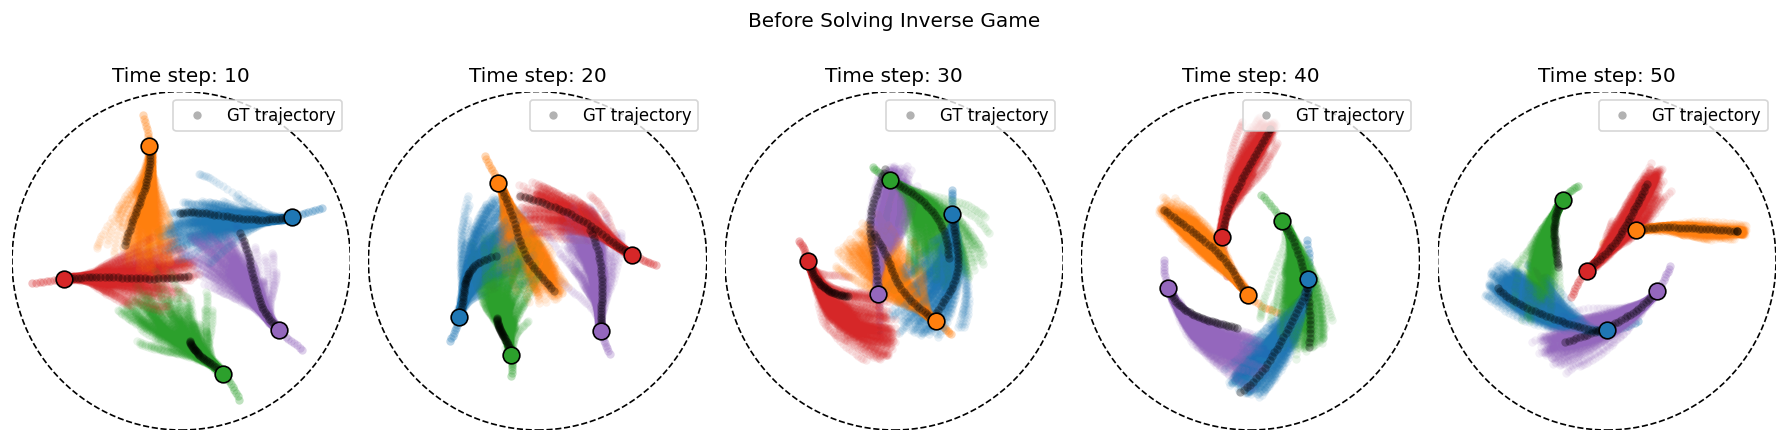

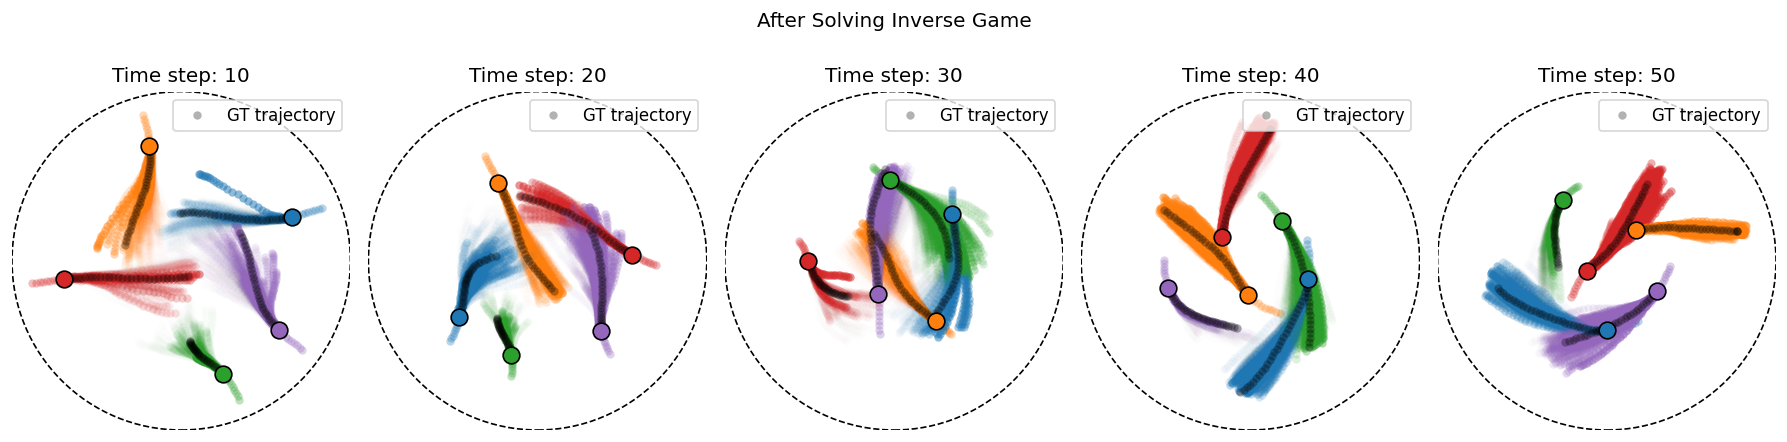

In [23]:
@jax.jit 
def evaluate(params, z, y):
    x_hat = cvae.apply({'params': params}, z, y, method=cvae.decode)
    return x_hat

num_samples = 100

agent_radius = 0.5
obst_radius = 0.0
scene_radius = 4.0

fig1, axes1 = plt.subplots(1, 5, figsize=(15,4), dpi=120, tight_layout=True)
fig2, axes2 = plt.subplots(1, 5, figsize=(15,4), dpi=120, tight_layout=True)
test_t_list = [past_steps, past_steps+10, past_steps+20, past_steps+30, past_steps+40]

test_idx = 12
for i, test_t in enumerate(test_t_list):
    circle1 = patches.Circle(
        (0.0, 0.0), 
        scene_radius + agent_radius,
        edgecolor='k', linestyle='--', facecolor='none'
    )
    circle2 = patches.Circle(
        (0.0, 0.0), 
        scene_radius + agent_radius,
        edgecolor='k', linestyle='--', facecolor='none'
    )

    ax = axes1[i]
    ax.axis('off')
    ax.set_title(f'Time step: {test_t}')
    ax.set_aspect('equal')
    ax.set_xlim(-scene_radius-agent_radius, scene_radius+agent_radius)
    ax.set_ylim(-scene_radius-agent_radius, scene_radius+agent_radius)
    ax.add_patch(circle1)
    
    ax = axes2[i]
    ax.axis('off')
    ax.set_title(f'Time step: {test_t}')
    ax.set_aspect('equal')
    ax.set_xlim(-scene_radius-agent_radius, scene_radius+agent_radius)
    ax.set_ylim(-scene_radius-agent_radius, scene_radius+agent_radius)
    ax.add_patch(circle2)

    input_traj_1 = dataset[i][0, test_t-past_steps:test_t, :]
    input_traj_2 = dataset[i][1, test_t-past_steps:test_t, :]
    input_traj_3 = dataset[i][2, test_t-past_steps:test_t, :]
    input_traj_4 = dataset[i][3, test_t-past_steps:test_t, :]
    input_traj_5 = dataset[i][4, test_t-past_steps:test_t, :]

    output_traj_1 = dataset[i][0, test_t:test_t+futr_steps, :]
    output_traj_2 = dataset[i][1, test_t:test_t+futr_steps, :]
    output_traj_3 = dataset[i][2, test_t:test_t+futr_steps, :]
    output_traj_4 = dataset[i][3, test_t:test_t+futr_steps, :]
    output_traj_5 = dataset[i][4, test_t:test_t+futr_steps, :]

    goal_1 = goal_dataset[i][0]
    goal_2 = goal_dataset[i][1]
    goal_3 = goal_dataset[i][2]
    goal_4 = goal_dataset[i][3]
    goal_5 = goal_dataset[i][4]

    curr_state_1 = input_traj_1[-1]
    curr_state_2 = input_traj_2[-1]
    curr_state_3 = input_traj_3[-1]
    curr_state_4 = input_traj_4[-1]
    curr_state_5 = input_traj_5[-1]

    cvae_input_traj_1 = jnp.concatenate([
        fwd_tf_traj(curr_state_1, input_traj_1),
        fwd_tf_traj(curr_state_1, jnp.ones((past_steps,1)) * goal_1),
    ], axis=-1)
    cvae_input_traj_2 = jnp.concatenate([
        fwd_tf_traj(curr_state_2, input_traj_2),
        fwd_tf_traj(curr_state_2, jnp.ones((past_steps,1)) * goal_2),
    ], axis=-1)
    cvae_input_traj_3 = jnp.concatenate([
        fwd_tf_traj(curr_state_3, input_traj_3),
        fwd_tf_traj(curr_state_3, jnp.ones((past_steps,1)) * goal_3),
    ], axis=-1)
    cvae_input_traj_4 = jnp.concatenate([
        fwd_tf_traj(curr_state_4, input_traj_4),
        fwd_tf_traj(curr_state_4, jnp.ones((past_steps,1)) * goal_4),
    ], axis=-1)
    cvae_input_traj_5 = jnp.concatenate([
        fwd_tf_traj(curr_state_5, input_traj_5),
        fwd_tf_traj(curr_state_5, jnp.ones((past_steps,1)) * goal_5),
    ], axis=-1)

    key, subkey = jax.random.split(key)
    z_batch_1 = jax.random.normal(key, shape=(num_samples, 1, latent_dim))
    pred_traj_list_1 = vmap(evaluate, in_axes=(None,0,None))(params, z_batch_1, jnp.array([cvae_input_traj_1]))[:,0,...]
    pred_traj_list_1 = vmap(bwd_tf_traj, in_axes=(None,0))(curr_state_1, pred_traj_list_1)

    key, subkey = jax.random.split(key)
    z_batch_2 = jax.random.normal(key, shape=(num_samples, 1, latent_dim))
    pred_traj_list_2 = vmap(evaluate, in_axes=(None,0,None))(params, z_batch_2, jnp.array([cvae_input_traj_2]))[:,0,...]
    pred_traj_list_2 = vmap(bwd_tf_traj, in_axes=(None,0))(curr_state_2, pred_traj_list_2)

    key, subkey = jax.random.split(key)
    z_batch_3 = jax.random.normal(key, shape=(num_samples, 1, latent_dim))
    pred_traj_list_3 = vmap(evaluate, in_axes=(None,0,None))(params, z_batch_3, jnp.array([cvae_input_traj_3]))[:,0,...]
    pred_traj_list_3 = vmap(bwd_tf_traj, in_axes=(None,0))(curr_state_3, pred_traj_list_3)

    key, subkey = jax.random.split(key)
    z_batch_4 = jax.random.normal(key, shape=(num_samples, 1, latent_dim))
    pred_traj_list_4 = vmap(evaluate, in_axes=(None,0,None))(params, z_batch_4, jnp.array([cvae_input_traj_4]))[:,0,...]
    pred_traj_list_4 = vmap(bwd_tf_traj, in_axes=(None,0))(curr_state_4, pred_traj_list_4)

    key, subkey = jax.random.split(key)
    z_batch_5 = jax.random.normal(key, shape=(num_samples, 1, latent_dim))
    pred_traj_list_5 = vmap(evaluate, in_axes=(None,0,None))(params, z_batch_5, jnp.array([cvae_input_traj_5]))[:,0,...]
    pred_traj_list_5 = vmap(bwd_tf_traj, in_axes=(None,0))(curr_state_5, pred_traj_list_5)

    brne_trajs_1, brne_trajs_2, brne_trajs_3, brne_trajs_4, brne_trajs_5, ws_1, ws_2, ws_3, ws_4, ws_5 = brne(
        jnp.array([pred_traj_list_1]), jnp.array([pred_traj_list_2]), jnp.array([pred_traj_list_3]), jnp.array([pred_traj_list_4]), jnp.array([pred_traj_list_5])
    )
    brne_trajs_1 = brne_trajs_1[0]
    brne_trajs_2 = brne_trajs_2[0]
    brne_trajs_3 = brne_trajs_3[0]
    brne_trajs_4 = brne_trajs_4[0]
    brne_trajs_5 = brne_trajs_5[0]
    
    ws_1 = np.array(ws_1[0]) / np.max(ws_1[0])
    ws_2 = np.array(ws_2[0]) / np.max(ws_2[0])
    ws_3 = np.array(ws_3[0]) / np.max(ws_3[0])
    ws_4 = np.array(ws_4[0]) / np.max(ws_4[0])
    ws_5 = np.array(ws_5[0]) / np.max(ws_5[0])

    ax = axes1[i]
    ax.plot(input_traj_1[:,0], input_traj_1[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C0', alpha=0.3)
    ax.plot(input_traj_2[:,0], input_traj_2[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C1', alpha=0.3)
    ax.plot(input_traj_3[:,0], input_traj_3[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C2', alpha=0.3)
    ax.plot(input_traj_4[:,0], input_traj_4[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C3', alpha=0.3)
    ax.plot(input_traj_5[:,0], input_traj_5[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C4', alpha=0.3)

    ax = axes2[i]
    ax.plot(input_traj_1[:,0], input_traj_1[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C0', alpha=0.3)
    ax.plot(input_traj_2[:,0], input_traj_2[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C1', alpha=0.3)
    ax.plot(input_traj_3[:,0], input_traj_3[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C2', alpha=0.3)
    ax.plot(input_traj_4[:,0], input_traj_4[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C3', alpha=0.3)
    ax.plot(input_traj_5[:,0], input_traj_5[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C4', alpha=0.3)

    for j in range(num_samples):
        pred_traj_1 = pred_traj_list_1[j]
        pred_traj_2 = pred_traj_list_2[j]
        pred_traj_3 = pred_traj_list_3[j]
        pred_traj_4 = pred_traj_list_4[j]
        pred_traj_5 = pred_traj_list_5[j]

        ax = axes1[i]
        ax.plot(pred_traj_1[:,0], pred_traj_1[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C0', alpha=0.1)
        ax.plot(pred_traj_2[:,0], pred_traj_2[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C1', alpha=0.1)
        ax.plot(pred_traj_3[:,0], pred_traj_3[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C2', alpha=0.1)
        ax.plot(pred_traj_4[:,0], pred_traj_4[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C3', alpha=0.1)
        ax.plot(pred_traj_5[:,0], pred_traj_5[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C4', alpha=0.1)

        ### Visualize the *weighted* samples from BRNE inference
        ax = axes2[i]
        ax.plot(pred_traj_1[:,0], pred_traj_1[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C0', alpha=float(0.5*ws_1[j]))
        ax.plot(pred_traj_2[:,0], pred_traj_2[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C1', alpha=float(0.5*ws_2[j]))
        ax.plot(pred_traj_3[:,0], pred_traj_3[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C2', alpha=float(0.5*ws_3[j]))
        ax.plot(pred_traj_4[:,0], pred_traj_4[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C3', alpha=float(0.5*ws_4[j]))
        ax.plot(pred_traj_5[:,0], pred_traj_5[:,1], linestyle='', marker='o', markersize=5, markeredgecolor='none', color='C4', alpha=float(0.5*ws_5[j]))

    ax = axes1[i]
    ax.plot(output_traj_1[:,0], output_traj_1[:,1], linestyle='', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='k', alpha=0.3, label='GT trajectory')
    ax.plot(output_traj_2[:,0], output_traj_2[:,1], linestyle='', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='k', alpha=0.3)
    ax.plot(output_traj_3[:,0], output_traj_3[:,1], linestyle='', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='k', alpha=0.3)
    ax.plot(output_traj_4[:,0], output_traj_4[:,1], linestyle='', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='k', alpha=0.3)
    ax.plot(output_traj_5[:,0], output_traj_5[:,1], linestyle='', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='k', alpha=0.3)
    ax.plot(curr_state_1[0], curr_state_1[1], linestyle='', marker='o', markersize=10, markeredgecolor='k', color='C0', alpha=1.0)
    ax.plot(curr_state_2[0], curr_state_2[1], linestyle='', marker='o', markersize=10, markeredgecolor='k', color='C1', alpha=1.0)
    ax.plot(curr_state_3[0], curr_state_3[1], linestyle='', marker='o', markersize=10, markeredgecolor='k', color='C2', alpha=1.0)
    ax.plot(curr_state_4[0], curr_state_4[1], linestyle='', marker='o', markersize=10, markeredgecolor='k', color='C3', alpha=1.0)
    ax.plot(curr_state_5[0], curr_state_5[1], linestyle='', marker='o', markersize=10, markeredgecolor='k', color='C4', alpha=1.0)
    ax.legend(loc=1)

    ax = axes2[i]
    ax.plot(output_traj_1[:,0], output_traj_1[:,1], linestyle='', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='k', alpha=0.3, label='GT trajectory')
    ax.plot(output_traj_2[:,0], output_traj_2[:,1], linestyle='', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='k', alpha=0.3)
    ax.plot(output_traj_3[:,0], output_traj_3[:,1], linestyle='', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='k', alpha=0.3)
    ax.plot(output_traj_4[:,0], output_traj_4[:,1], linestyle='', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='k', alpha=0.3)
    ax.plot(output_traj_5[:,0], output_traj_5[:,1], linestyle='', linewidth=2.0, marker='o', markersize=5, markeredgecolor='none', color='k', alpha=0.3)
    ax.plot(curr_state_1[0], curr_state_1[1], linestyle='', marker='o', markersize=10, markeredgecolor='k', color='C0', alpha=1.0)
    ax.plot(curr_state_2[0], curr_state_2[1], linestyle='', marker='o', markersize=10, markeredgecolor='k', color='C1', alpha=1.0)
    ax.plot(curr_state_3[0], curr_state_3[1], linestyle='', marker='o', markersize=10, markeredgecolor='k', color='C2', alpha=1.0)
    ax.plot(curr_state_4[0], curr_state_4[1], linestyle='', marker='o', markersize=10, markeredgecolor='k', color='C3', alpha=1.0)
    ax.plot(curr_state_5[0], curr_state_5[1], linestyle='', marker='o', markersize=10, markeredgecolor='k', color='C4', alpha=1.0)
    ax.legend(loc=1)

fig1.suptitle('Before Solving Inverse Game')
fig2.suptitle('After Solving Inverse Game')

plt.show()
plt.close()